1) Loading necessary libraries

In [1]:
import tensorflow as tf
import keras

import pandas as pd                       # importing pandas libarary, pyton data analysis library 
pd.set_option('display.max_rows', None)   # to retrieve output for all rows

import numpy as np                        # importing numpy or python array object library 
import seaborn as sn
import matplotlib.pyplot as plt           # importing matplotlib library, python data visualization library 
%matplotlib inline
import statistics as st 

from keras.utils import plot_model              

import pydot as pydot                           
import pydotplus                                
from keras.utils.vis_utils import model_to_dot  

from sklearn.model_selection import train_test_split          # importing data splitter 
# from sklearn.metrics import accuracy_score                    # importing accuracy score to determine model accuracy 
# from sklearn.metrics import confusion_matrix                  # importing confution matrix 
# from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler              # convert data into a standard scale
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\anaconda3\e

2) Load pre-processed data file

In [2]:
df = pd.read_excel("C:/Users/Asus/Desktop/Data/research/Defect_Occurrence.xlsx")

In [3]:
df.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature,Defect_Occurrence
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560,35.0,344,35.0,180,63,29.3,1
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560,35.0,344,35.0,180,59,31.5,0
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560,35.0,344,35.0,180,52,33.8,1
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560,35.0,344,35.0,180,50,34.5,1
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560,35.0,344,35.0,180,48,34.9,1


3) Neural Network Model - Multilayer Perceptron

In [4]:
# remove response variable column from data frame

X = df.drop(['Defect_Occurrence'], axis=1)
X.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560,35.0,344,35.0,180,63,29.3
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560,35.0,344,35.0,180,59,31.5
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560,35.0,344,35.0,180,52,33.8
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560,35.0,344,35.0,180,50,34.5
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560,35.0,344,35.0,180,48,34.9


In [5]:
# Load response variable to seperate dataframe

y = df['Defect_Occurrence'].values

In [6]:
# Data spliting for training and testinf sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% for training and 30% for testing

# train set is used to train the model meaning; find weights and biases. 

# Random state ensures that the splits generate are reproducible. 
# Scikit-learn uses random permutations to generate the splits.
# If random_state is not specified every timethe code is run(execute) a new random value is generated and 
# the train and test datasets would have different values each time.
# random_state = 0 or 1 or 42 or any other integer. Then result would be the same during every execute.

print("Training Data Shape of X :",X_train.shape)
print("Training Data Shape of y :",y_train.shape)
print("Testing Data Shape of X :",X_test.shape)
print("Testing Data Shape of y :",y_test.shape)

Training Data Shape of X : (1008, 19)
Training Data Shape of y : (1008,)
Testing Data Shape of X : (432, 19)
Testing Data Shape of y : (432,)


In [7]:
# Extract predicted output

expected_output = y_test

In [8]:
# normalize the values, meaning take each X in the training and test data set and calculate (X – μ) / δ
# or the distance from the mean (μ) divided by the standard deviation (δ). 
# That put the data on a standard scale, which is a standard practice with machine learning.

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# created a Keras sequential model( build layers by adding one at a time)
keras_model = Sequential()

# dense function is the number of hidden units
# input layer with 50 nurones, relu activation function and with 19 input parameters
keras_model.add(Dense(50, activation='relu', input_shape=(19,))) 

# hidden layers - 20 neurons, ReLU activation
keras_model.add(Dense(20, activation='relu'))

# output layer - 1 neuron, relu activation
keras_model.add(Dense(1, activation='sigmoid'))  

# keras model configuration
# loss — difference between predicted and observed values) Use binary_crossentropy function as response varaible is binary.
# optimizer — use optimizer function adam
# epoch — means how many times to run the model.
# metrics — means what metrics to display as it runs (Accuracy means how accurately the evolving model predicts the outcome)
# batch_size — divide the input data into 1 batch and process 
# fit() — trains the model by calculating the weights, biases, number of layers, etc.

keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

#  weights for each layer
for layer in keras_model.layers:
    weights = layer.get_weights()
    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.6369 - accuracy: 0.6508
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7391
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.4696 - accuracy: 0.7728 ETA: 
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.4178 - accuracy: 0.8125
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3827 - accuracy: 0.8383
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3398 - accuracy: 0.8631
Epoch 7/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.3110 - accuracy: 0.8651
Epoch 8/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2947 - accuracy: 0.8770
Epoch 9/100
1008/1008 [==============================] - 3s 3ms/step - loss

1008/1008 [==============================] - 1s 1ms/step - loss: 0.1002 - accuracy: 0.9365
Epoch 74/100
1008/1008 [==============================] - 1s 926us/step - loss: 0.0984 - accuracy: 0.9385
Epoch 75/100
1008/1008 [==============================] - 1s 967us/step - loss: 0.1023 - accuracy: 0.9405
Epoch 76/100
1008/1008 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.93 - 1s 1ms/step - loss: 0.1149 - accuracy: 0.9375
Epoch 77/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.0976 - accuracy: 0.9365
Epoch 78/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.0962 - accuracy: 0.9325
Epoch 79/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.1026 - accuracy: 0.9355
Epoch 80/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9385
Epoch 81/100
1008/1008 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.9365
Epoch 82/100
1008/1008 [=======

In [9]:
# test model

y_prediction = keras_model.predict_classes(X_test)
score = keras_model.evaluate(X_test, y_test, verbose=1)
print("\n\n", score) 

# accuracy: 0.9059259104728699 for 50 epoches
# accuracy : 0.9212962985038757 for 100 epoches

432/432 [==============================] - 0s 83us/step


 [0.12691321389542687, 0.9189814925193787]


In [10]:
# evaluate the model

scores = keras_model.evaluate(X_test, y_test, verbose=0)

print("%s: %.2f%%" % (keras_model.metrics_names[1], scores[1]))

cvscores = []
cvscores.append(scores[1] * 100)
print("%.4f%% (+/- %.4f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 0.92%
91.8981% (+/- 0.0000%)


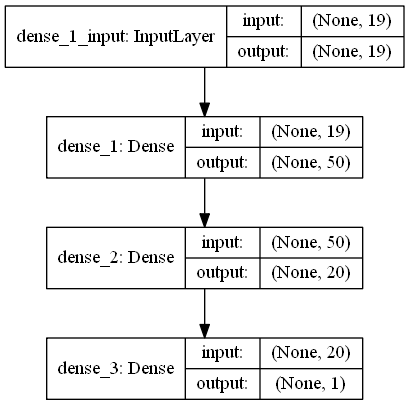

In [11]:
#plot_model(keras_model, to_file='C:/Users/Asus/Desktop/Data/model.png', show_shapes=True,)

keras.utils.vis_utils.pydot = pydot

plot_model(keras_model, to_file='C:/Users/Asus/Desktop/Data/neural_network.png', show_shapes=True,)

KeyError: 'val_accuracy'

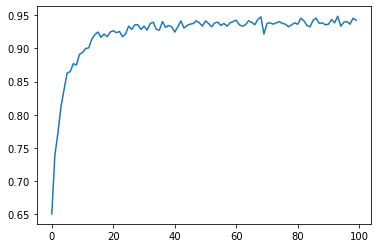

In [12]:
# summarize history for accuracy

plt.plot(keras_model.history.history['accuracy'])
plt.plot(keras_model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss

plt.plot(keras_model.history.history['loss'])
plt.plot(keras_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()